**Clustering Batsmen and Bowlers according to their Performance in IPL**

In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving IPL Ball-by-Ball 2008-2020.csv to IPL Ball-by-Ball 2008-2020.csv


In [ ]:
runs=pd.read_csv(io.BytesIO(uploaded['IPL Ball-by-Ball 2008-2020.csv'])) 
runs.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Keeping only relevant data for analysis
runs = runs[["match_id", "ball", "striker","bowler", "runs_off_bat", "extras" , "wides", "noballs", "legbyes", "player_dismissed"]]
runs.head()

,match_id,ball,striker,bowler,runs_off_bat,extras,wides,noballs,legbyes,player_dismissed
0,335982,0.1,SC Ganguly,P Kumar,0,1,NaN,NaN,1.0,NaN
1,335982,0.2,BB McCullum,P Kumar,0,0,NaN,NaN,NaN,NaN
2,335982,0.3,BB McCullum,P Kumar,0,1,1.0,NaN,NaN,NaN
3,335982,0.4,BB McCullum,P Kumar,0,0,NaN,NaN,NaN,NaN
4,335982,0.5,BB McCullum,P Kumar,0,0,NaN,NaN,NaN,NaN


In [ ]:
runs.isnull().sum()

match_id                 0
ball                     0
striker                  0
bowler                   0
runs_off_bat             0
extras                   0
wides               187753
noballs             192848
legbyes             190506
player_dismissed    184095
dtype: int64

In [ ]:
runs["noballs"] = runs["noballs"].fillna(0)
runs["legbyes"] = runs["legbyes"].fillna(0)
runs["wides"] = runs["wides"].fillna(0)
runs["player_dismissed"] = runs["player_dismissed"].fillna(0)

In [ ]:
runs.isnull().sum()

match_id            0
ball                0
striker             0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
legbyes             0
player_dismissed    0
dtype: int64

**Creation of Batsmen dataset & calculation of their strike rate**

In [ ]:
# To analyse the strike rate of a bastman, we need runs scored by him and the number of balls he faced.
# The strike rate for the batsman can be calculated from these two values.
A = []
B = []
C = []
for i in runs["striker"].unique():
 a = runs["runs_off_bat"][runs["striker"] == i].sum() #sum of runs scored by the pla
 balls =  runs["match_id"][runs['striker']== i].count() - runs['noballs'][runs["striker"]== i].sum() - runs['wides'][runs["striker"]== i].sum()
 out = runs["match_id"][runs['player_dismissed']== i].count()
# The strike rate for the batsman can be calculated from these two values.
 A.append(a)
 B.append(balls)
 C.append(out)


In [ ]:
Batsmen = pd.DataFrame({"Player_names": runs["striker"].unique()})
Batsmen["Runs"] = A
Batsmen["Balls_played"] = B
Batsmen["Out"] = C
Batsmen.head(10)

,Player_names,Runs,Balls_played,Out
0,SC Ganguly,1349,1243.0,53
1,BB McCullum,2882,2118.0,104
2,RT Ponting,91,127.0,9
3,DJ Hussey,1322,1063.0,49
4,Mohammad Hafeez,64,83.0,7
5,R Dravid,2174,1865.0,77
6,W Jaffer,130,121.0,8
7,V Kohli,5888,4462.0,154
8,JH Kallis,2427,2195.0,85
9,CL White,971,757.0,36


In [ ]:
Batsmen = Batsmen[Batsmen["Balls_played"] > 300]
Batsmen.head()

,Player_names,Runs,Balls_played,Out
0,SC Ganguly,1349,1243.0,53
1,BB McCullum,2882,2118.0,104
3,DJ Hussey,1322,1063.0,49
5,R Dravid,2174,1865.0,77
7,V Kohli,5888,4462.0,154


In [ ]:
Batsmen.sample(15)

,Player_names,Runs,Balls_played,Out
339,KK Nair,1480,1145.0,61
398,SN Khan,441,312.0,17
9,CL White,971,757.0,36
260,MA Agarwal,1698,1247.0,80
163,MC Henriques,969,751.0,34
201,R Ashwin,412,373.0,38
162,CH Gayle,4804,3149.0,117
85,AM Rahane,3933,3220.0,124
96,MK Pandey,3277,2667.0,111
31,SR Watson,3880,2780.0,126


In [ ]:
Batsmen["Strike_Rate"] = (Batsmen["Runs"] * 100 / Batsmen["Balls_played"]).round(2)
Batsmen["Average"] = (Batsmen["Runs"] / Batsmen["Out"]).round(2)
Batsmen.head(10)

,Player_names,Runs,Balls_played,Out,Strike_Rate,Average
0,SC Ganguly,1349,1243.0,53,108.53,25.45
1,BB McCullum,2882,2118.0,104,136.07,27.71
3,DJ Hussey,1322,1063.0,49,124.37,26.98
5,R Dravid,2174,1865.0,77,116.57,28.23
7,V Kohli,5888,4462.0,154,131.96,38.23
8,JH Kallis,2427,2195.0,85,110.57,28.55
9,CL White,971,757.0,36,128.27,26.97
10,MV Boucher,394,307.0,14,128.34,28.14
13,P Kumar,340,307.0,38,110.75,8.95
16,PA Patel,2848,2336.0,126,121.92,22.60


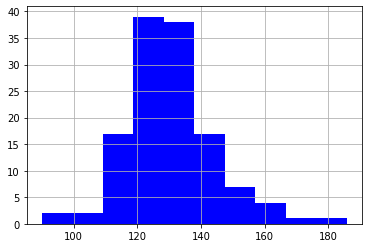

In [ ]:
# Checking the distribution of batsmen by plotting a histogram
# x axis is the stike rante y axis is the number of players
Batsmen["Strike_Rate"].hist(color="blue")

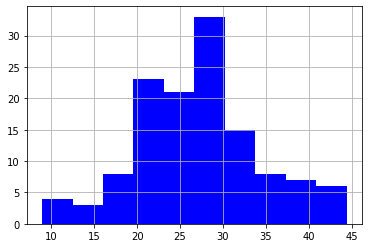

In [ ]:
Batsmen["Average"].hist(color="blue")

**Applying Kmeans Algorithm to the batsmen dataset**

**Batsmen Clusters - STRIKE RATE**

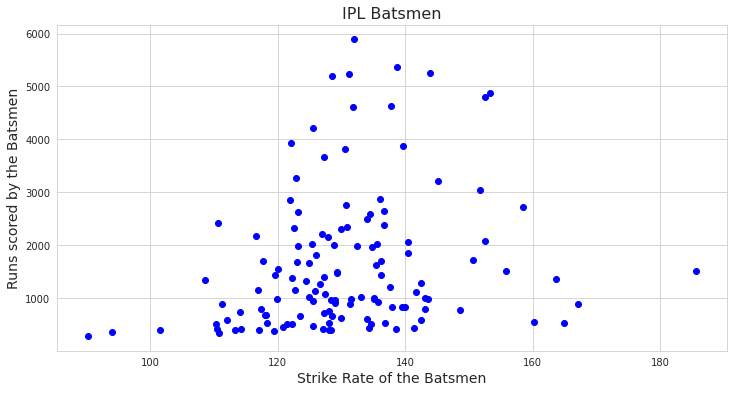

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(Batsmen["Strike_Rate"], Batsmen["Runs"], color="blue")
plt.xlabel("Strike Rate of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
plt.title("IPL Batsmen", fontsize=16)
plt.show()


The distribution of the Batsmen appears to be in largely five clusters:
under 500 runs - highest density of dots
500 - 1000 runs
1000 - 2000 runs
2000 - 3000 runs
above 3000 runs

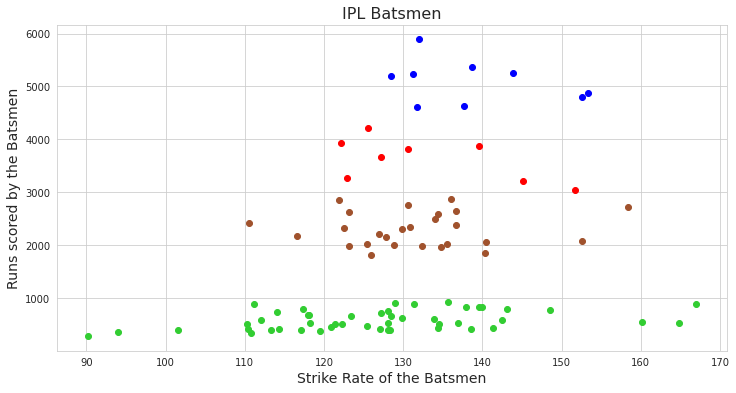

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Batsmen[["Strike_Rate", "Runs"]])
Batsmen["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "sienna", "limegreen", "red", "indigo"]

for r in range(1,6):
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Strike_Rate"], clustered_Batsmen["Runs"], color=colors[r-1])
    
plt.title("IPL Batsmen", fontsize=16)
plt.xlabel("Strike Rate of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
    
plt.show()

In [ ]:
Batsmen.sample(10)

,Player_names,Runs,Balls_played,Out,Strike_Rate,Average,cluster
398,SN Khan,441,312.0,17,141.35,25.94,3
394,HH Pandya,1358,830.0,46,163.61,29.52,0
158,JP Duminy,2029,1618.0,51,125.40,39.78,2
64,DPMD Jayawardene,1808,1436.0,64,125.91,28.25,2
8,JH Kallis,2427,2195.0,85,110.57,28.55,2
207,MS Bisla,798,680.0,38,117.35,21.00,3
276,Shakib Al Hasan,748,584.0,36,128.08,20.78,3
237,Mandeep Singh,1659,1328.0,75,124.92,22.12,0
3,DJ Hussey,1322,1063.0,49,124.37,26.98,0
178,TL Suman,676,573.0,32,117.98,21.12,3


**Batsmen Clusters - AVERAGE**
Average is a better metric to rank batsmen

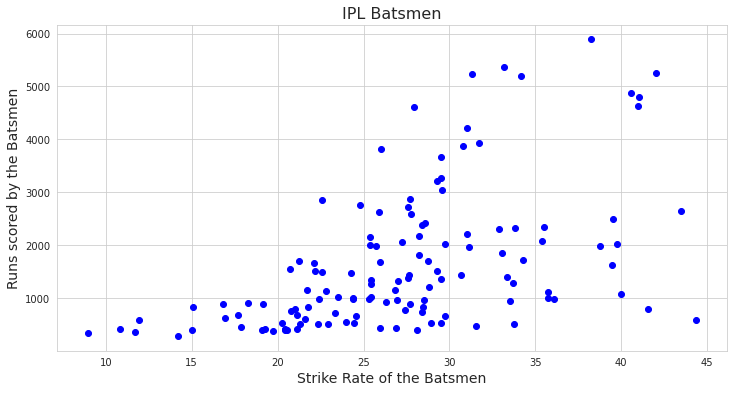

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(Batsmen["Average"], Batsmen["Runs"], color="blue")
plt.xlabel("Strike Rate of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
plt.title("IPL Batsmen", fontsize=16)
plt.show()

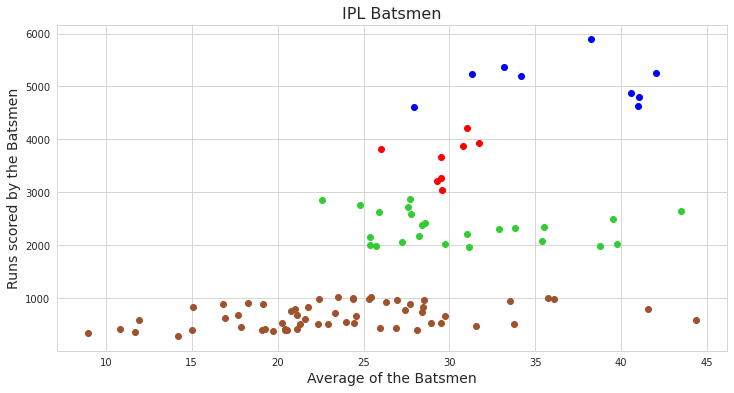

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Batsmen[["Average", "Runs"]])
Batsmen["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "sienna", "limegreen", "red", "indigo"]

for r in range(1,6):
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Average"], clustered_Batsmen["Runs"], color=colors[r-1])
    
plt.title("IPL Batsmen", fontsize=16)
plt.xlabel("Average of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
    
plt.show()

In [ ]:
Batsmen.sample(10)

,Player_names,Runs,Balls_played,Out,Strike_Rate,Average,cluster
133,A Mishra,362,385.0,31,94.03,11.68,2
207,MS Bisla,798,680.0,38,117.35,21.00,2
67,PP Chawla,584,521.0,49,112.09,11.92,2
55,ST Jayasuriya,768,517.0,28,148.55,27.43,2
8,JH Kallis,2427,2195.0,85,110.57,28.55,3
305,GJ Maxwell,1506,967.0,68,155.74,22.15,0
167,PC Valthaty,505,413.0,22,122.28,22.95,2
396,SS Iyer,2204,1736.0,71,126.96,31.04,3
97,SA Asnodkar,423,333.0,20,127.03,21.15,2
178,TL Suman,676,573.0,32,117.98,21.12,2


**Creation of Bowlers dataset & calculation of their economy**

In [ ]:
# To analyse the performance of a bowler, we need runs given by him and the number of overs he bowled.
# The economy rate of the bowler can be calculated from these two values.
D = []
E = []

for j in runs["bowler"].unique():
    #runs given by him can be calculated by the sum of the runs and extras given by a bowler
    d = runs["runs_off_bat"][runs["bowler"] == j].sum() + runs["wides"][runs["bowler"] == j].sum() + runs["noballs"][runs["bowler"] == j].sum() 
        #counting the number of balls bowled by a bowler
    e = ((runs["ball"][runs["bowler"] == j].count() - runs["wides"][runs["bowler"] == j].sum() - runs["noballs"][runs["bowler"] == j].sum()) // 6)
    
    D.append(d)
    E.append(e)
    
Bowlers = pd.DataFrame({"Bowler_names": runs["bowler"].unique()})

Bowlers["Runs"] = D
Bowlers["Overs"] = E
Bowlers.head()


,Bowler_names,Runs,Overs
0,P Kumar,3251.0,415.0
1,Z Khan,2782.0,364.0
2,AA Noffke,40.0,3.0
3,JH Kallis,2293.0,288.0
4,SB Joshi,82.0,9.0


In [ ]:
Bowlers = Bowlers[Bowlers["Overs"] > 100]
Bowlers.head()

,Bowler_names,Runs,Overs
0,P Kumar,3251.0,415.0
1,Z Khan,2782.0,364.0
3,JH Kallis,2293.0,288.0
6,AB Dinda,2073.0,250.0
7,I Sharma,2604.0,316.0


In [ ]:
# Economy rate can be calculated by dividing the total runs conceded by the number of overs bowled.
Bowlers["Econ_Rate"] = (Bowlers["Runs"] / Bowlers["Overs"]).round(2)
Bowlers.head()

,Bowler_names,Runs,Overs,Econ_Rate
0,P Kumar,3251.0,415.0,7.83
1,Z Khan,2782.0,364.0,7.64
3,JH Kallis,2293.0,288.0,7.96
6,AB Dinda,2073.0,250.0,8.29
7,I Sharma,2604.0,316.0,8.24


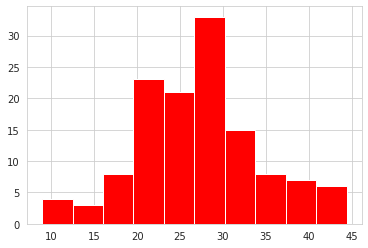

In [ ]:
Batsmen["Average"].hist(color="red")

**Applying K-means algorithm to bowlers dataser**

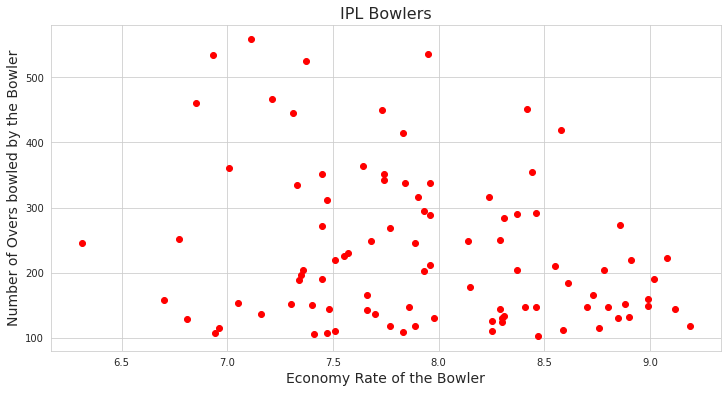

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(Bowlers["Econ_Rate"], Bowlers["Overs"], color="red")
plt.xlabel("Economy Rate of the Bowler", fontsize=14)
plt.ylabel("Number of Overs bowled by the Bowler", fontsize=14)
plt.title("IPL Bowlers", fontsize=16)
plt.show()

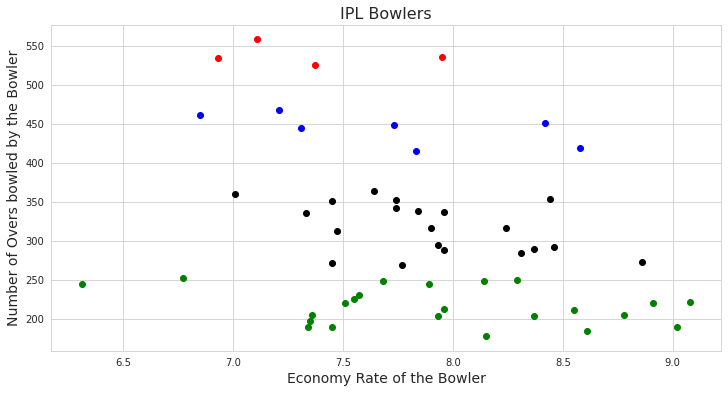

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Bowlers[["Econ_Rate", "Overs"]])
Bowlers["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "green", "black", "red"]

for r in range(1,5):
    clustered_Bowlers = Bowlers[Bowlers["cluster"] == r]
    plt.scatter(clustered_Bowlers["Econ_Rate"], clustered_Bowlers["Overs"], color=colors[r-1])
    
plt.title("IPL Bowlers", fontsize=16)
plt.xlabel("Economy Rate of the Bowler", fontsize=14)
plt.ylabel("Number of Overs bowled by the Bowler", fontsize=14)
    
plt.show()

**Bowlers Clusters**

In [ ]:
Bowlers.sample(10)

,Bowler_names,Runs,Overs,Econ_Rate,cluster
126,SB Jakati,1451.0,178.0,8.15,2
16,PP Chawla,4263.0,536.0,7.95,4
7,I Sharma,2604.0,316.0,8.24,3
293,S Gopal,1164.0,148.0,7.86,0
89,RA Jadeja,3470.0,449.0,7.73,1
231,SP Narine,3158.0,461.0,6.85,1
336,BA Stokes,962.0,112.0,8.59,0
55,DJ Bravo,3798.0,451.0,8.42,1
363,JC Archer,981.0,137.0,7.16,0
299,MJ McClenaghan,1803.0,211.0,8.55,2
